In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
pd.options.mode.chained_assignment = None  # default='warn'
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend as K
import os
import matplotlib.pyplot as plt
import sklearn

In [2]:
train_df = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")
test_df = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")

In [3]:
print(train_df.shape,test_df.shape)

(1460, 81) (1459, 80)


In [4]:
feature_ids = test_df.pop("Id")
feature = train_df.pop("SalePrice")
big_df = pd.concat([train_df,test_df], axis=0, sort=False)

In [5]:
print(big_df.isna().sum().sort_values(ascending=True)[-20:])

MSZoning           4
MasVnrArea        23
MasVnrType        24
BsmtFinType1      79
BsmtFinType2      80
BsmtQual          81
BsmtExposure      82
BsmtCond          82
GarageType       157
GarageFinish     159
GarageQual       159
GarageYrBlt      159
GarageCond       159
LotFrontage      486
FireplaceQu     1420
Id              1459
Fence           2348
Alley           2721
MiscFeature     2814
PoolQC          2909
dtype: int64


In [6]:
#big_df.drop(["LotFrontage","FireplaceQu","Fence","Alley","MiscFeature","PoolQC"],axis=1, inplace=True)

In [7]:
NOMINAL_COL = ["BsmtFinType1","Foundation","MSSubClass",
               "MSZoning",
               "Street",
               "LotConfig",
               "Neighborhood",
               "Condition1",
               "Condition2",
               "BldgType",
               "HouseStyle",
               "RoofStyle",
               "RoofMatl",
               "Exterior1st",
               "Exterior2nd",
               "MasVnrType" ,
                "Heating",
               "CentralAir",
               "Electrical",
               "Functional",
               "GarageType",
               "GarageFinish",
               "PavedDrive",
               "SaleType", "SaleCondition"]

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
ORDINAL_COL = ["LotShape", "LandContour", "Utilities", "LandSlope", "ExterQual", "ExterCond", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType2", "HeatingQC", "KitchenQual", "GarageQual", "GarageCond"]
NUMERICAL_COL = train_df.select_dtypes(include=numerics).columns.to_list()

In [8]:
#NUMERICAL_COL.remove([""])

In [9]:
feature = np.log(feature+1)

In [10]:

#X_train.at[1165,"ExterCond"] ="Po"


for col in NOMINAL_COL:
    big_df[col].fillna(big_df[col].mode()[0],inplace=True)
    

for col in ORDINAL_COL:
    big_df[col].fillna(big_df[col].mode()[0],inplace=True)
    
for col in NUMERICAL_COL:
    big_df[col].fillna(big_df[col].mean(),inplace=True)

for col in ["BsmtQual","BsmtCond","BsmtExposure","BsmtFinType2","GarageQual","GarageCond"]:
    big_df[col] = big_df[col].fillna(big_df[col].mode()[0])
    
for col in ["BsmtQual","BsmtCond","BsmtExposure","BsmtFinType2","GarageQual","GarageCond","KitchenQual","Utilities"]:
    big_df[col] = big_df[col].fillna(big_df[col].mode()[0])
    


In [11]:
print(big_df.isna().sum().sort_values(ascending=True)[-50:])

GarageCond          0
GarageQual          0
GarageArea          0
GarageCars          0
GarageFinish        0
GarageType          0
TotalBsmtSF         0
Heating             0
BsmtFinSF2          0
HouseStyle          0
BldgType            0
Condition2          0
Condition1          0
Neighborhood        0
LandSlope           0
LotConfig           0
Utilities           0
LandContour         0
LotShape            0
Street              0
LotArea             0
LotFrontage         0
MSZoning            0
MSSubClass          0
BsmtUnfSF           0
OverallCond         0
OverallQual         0
BsmtQual            0
BsmtFinType2        0
BsmtFinSF1          0
BsmtFinType1        0
BsmtExposure        0
BsmtCond            0
YearBuilt           0
Foundation          0
ExterCond           0
SaleCondition       0
MasVnrArea          0
MasVnrType          0
Exterior2nd         0
Exterior1st         0
RoofMatl            0
RoofStyle           0
YearRemodAdd        0
ExterQual           0
FireplaceQ

In [12]:
big_df.drop(["FireplaceQu","Fence","Alley","MiscFeature", "PoolQC"], axis=1, inplace=True)

In [13]:
print(big_df.isna().sum().sort_values(ascending=True))

Id               0
TotRmsAbvGrd     0
KitchenQual      0
KitchenAbvGr     0
BedroomAbvGr     0
                ..
Exterior1st      0
RoofMatl         0
RoofStyle        0
YearBuilt        0
SaleCondition    0
Length: 75, dtype: int64


In [14]:
"""
ohe = (OneHotEncoder(handle_unknown='ignore'), 
        NOMINAL_COL)
ode =(OrdinalEncoder(), ORDINAL_COL)
minmax = (MinMaxScaler(), 
        train_df.select_dtypes(include=numerics).columns)
transformer = make_column_transformer(
    ohe,
    ode,
    minmax
)
train_df_norm = transformer.fit_transform(train_df)"""

big_df_dummy = pd.get_dummies(big_df)

train_df = big_df_dummy[0:1460]
test_df = big_df_dummy[1460:]
X_train, X_test, y_train, y_test = train_test_split(
    train_df, feature, test_size=0.2, random_state=42
)


In [15]:
def rmse(y_true, y_pred):    
    return K.sqrt(K.mean(K.square(y_pred - y_true)))

In [16]:
y_train = np.asarray(y_train).astype("float32")
X_train = np.asarray(X_train).astype("float32")

In [17]:
tf.random.set_seed(42)

model = Sequential([
    Dense(500, activation='relu'),
    Dense(100, activation='relu'),
    Dense(50, activation='relu'),
    Dense(1)
])

model.compile(
    loss=rmse,
    optimizer=Adam(),
    metrics=[rmse]
)

history = model.fit(X_train, y_train, epochs=500, verbose=0)


User settings:

   KMP_AFFINITY=granularity=fine,noverbose,compact,1,0
   KMP_BLOCKTIME=0
   KMP_DUPLICATE_LIB_OK=True
   KMP_INIT_AT_FORK=FALSE
   KMP_SETTINGS=1
   KMP_WARNINGS=0

Effective settings:

   KMP_ABORT_DELAY=0
   KMP_ADAPTIVE_LOCK_PROPS='1,1024'
   KMP_ALIGN_ALLOC=64
   KMP_ALL_THREADPRIVATE=128
   KMP_ATOMIC_MODE=2
   KMP_BLOCKTIME=0
   KMP_CPUINFO_FILE: value is not defined
   KMP_DETERMINISTIC_REDUCTION=false
   KMP_DEVICE_THREAD_LIMIT=2147483647
   KMP_DISP_NUM_BUFFERS=7
   KMP_DUPLICATE_LIB_OK=true
   KMP_ENABLE_TASK_THROTTLING=true
   KMP_FORCE_REDUCTION: value is not defined
   KMP_FOREIGN_THREADS_THREADPRIVATE=true
   KMP_FORKJOIN_BARRIER='2,2'
   KMP_FORKJOIN_BARRIER_PATTERN='hyper,hyper'
   KMP_GTID_MODE=3
   KMP_HANDLE_SIGNALS=false
   KMP_HOT_TEAMS_MAX_LEVEL=1
   KMP_HOT_TEAMS_MODE=0
   KMP_INIT_AT_FORK=true
   KMP_LIBRARY=throughput
   KMP_LOCK_KIND=queuing
   KMP_MALLOC_POOL_INCR=1M
   KMP_NUM_LOCKS_IN_BLOCK=1
   KMP_PLAIN_BARRIER='2,2'
   KMP_PLAIN_BARRIER

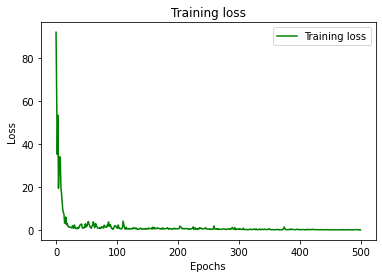

In [18]:
plt.plot(history.epoch, history.history["loss"], 'g', label='Training loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [19]:
results =model.predict(test_df)

In [20]:
df_results = pd.DataFrame(columns=["Id","SalePrice"])
df_results["Id"] = feature_ids
df_results["SalePrice"] = results

In [21]:
df_results.set_index("Id", inplace=True)

In [22]:
print(df_results)

      SalePrice
Id             
1461  11.877271
1462  10.543315
1463  12.356919
1464  12.386334
1465  12.222598
...         ...
2915  11.206903
2916  11.369952
2917  12.210258
2918  11.769248
2919  12.485459

[1459 rows x 1 columns]


In [23]:
df_results.to_csv("Submission10.csv")